In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# ***Business Understanding***

Airbnb is an online marketplace which lets people to rent their properties, rooms in their house, or share their rooms to the guests. This blog is an effort to interpret the Airbnb, Boston dataset retrieved from Kaggle and answer few business questions, mentioned below.

The dataset retrieved is a collection of property listings, their key features and types, such as property type, host type, neighborhood, reviews and much more.





1.) What are the features that influence the property pricing?

2.) What time of year has the highest rental prices?

3.) Do Superhosts perform better than other hosts?

4.) How are the listings distributed on Boston city?



In [66]:

%matplotlib inline
#import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Data Understanding

In [67]:
#Kaggle dataset
df_list = pd.read_csv("listings.csv")
df_cal = pd.read_csv("calendar.csv")
df_rev = pd.read_csv("reviews.csv")

#Identifyt the number of rows and columns in the dataset
for data in [df_list, df_cal, df_rev]:
    print(data.shape)

(3585, 95)
(1308890, 4)
(68275, 6)


In [5]:
#Explore the data set and identify the data type
for data in [df_list, df_cal, df_rev]:
    display(data.head(5))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [68]:
#check for the each column's datatype and the number of non-null values in the data set.

df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [69]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [70]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [9]:
#Columns will all value as NaN is useless and cannot be filled with any reference value in the column
#Remove the column which has all values as NaN
df_list.dropna(axis = 1, how = 'all', inplace = True)
df_list.shape

(3585, 91)

# Data Preparation - Listing dataset (df_list)

* In order to analyse the property size, we need to consider the **property type, room type, and bedrooms** feature from the data set.

* We will further explore the above said feature and create a new dataframe.

In [10]:
#Fill na with ffill/bfill since it is an object type and cannot be interpreted with numerical methods to fillna
df_list['host_response_rate'].fillna(method = 'backfill', inplace = True)
df_list['host_acceptance_rate'].fillna(method = 'backfill', inplace = True)
df_list['host_response_time'].fillna(method = 'backfill', inplace = True)


#Remove % sign and convert the data type to int
df_list['host_response_rate'] = (df_list['host_response_rate'].str[:-1].astype(int))
df_list['host_acceptance_rate'] = (df_list['host_acceptance_rate'].str[:-1].astype(int))



* accommodates                        3585 non-null int64
* bathrooms                           3571 non-null float64
* bedrooms                            3575 non-null float64
* beds                                3576 non-null float64
* bed_type                            3585 non-null object

In [11]:
#drop na rows in bathrooms, bedrooms, beds since its a negligle number of rows with na value
df_list.dropna(axis = 0, subset = ["bathrooms", "bedrooms", "beds"], inplace = True)

#Creating new dataframe with bathrooms, bedrooms, beds
df_rooms = df_list[["bathrooms", "bedrooms", "beds"]]

#Converting the data type from string to integer
for room in df_rooms:
    df_rooms[room].astype(int)
    
#Assigning the converted values from df_rooms to the df_list data frame
df_list[["bathrooms", "bedrooms", "beds"]] = df_rooms[["bathrooms", "bedrooms", "beds"]]

In [12]:
#replace $ from the price values and convert str into float data type
for feature in ["cleaning_fee", "security_deposit", "price"]:
    df_list[feature] = df_list[feature].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')
    df_list[feature] = df_list[feature].astype(float)
    df_list[feature].fillna(df_list[feature].median(), inplace = True)
    
    

# Lets fill na with median values for reviews columns
#The review data distribution above show that the data is highly skewed to left
#To avoid bias in result due to skewness we chose mean to fill na instead of other methods 
for feature in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]:
    df_list[feature].fillna(df_list[feature].mean(), inplace = True)

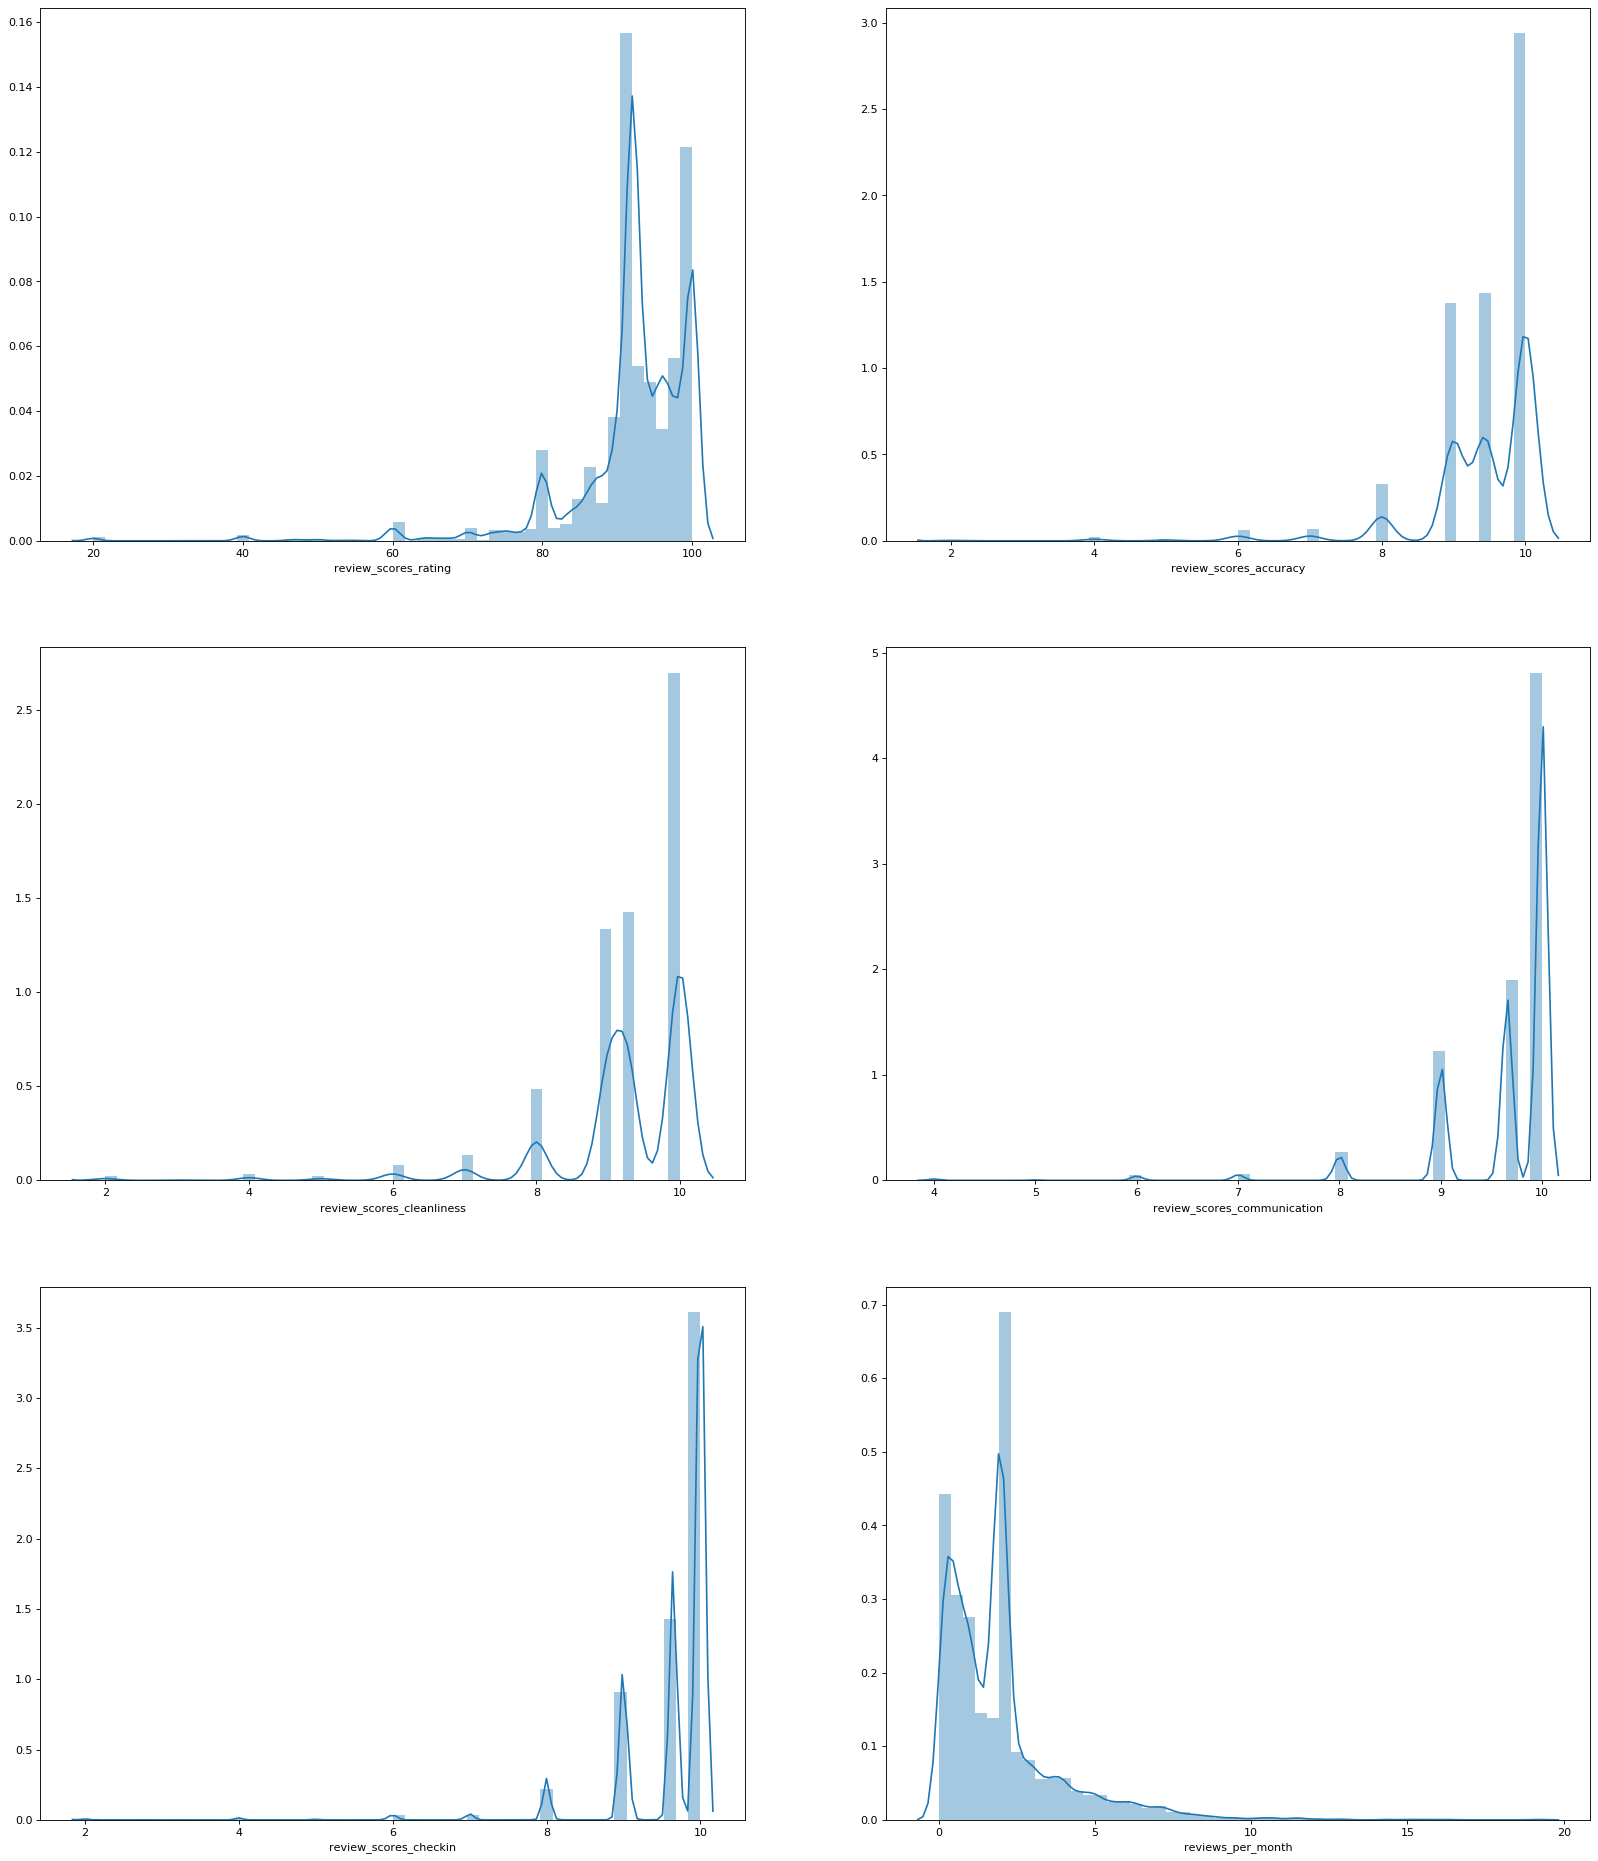

In [13]:
#Visualize the distribution of review data to understand how skewed it is
fig, axs = plt.subplots(3, 2, figsize=(25, 30), dpi=80)

sns.distplot(df_list["review_scores_rating"], ax=axs[0, 0])
sns.distplot(df_list["review_scores_accuracy"], ax=axs[0, 1])
sns.distplot(df_list["review_scores_cleanliness"], ax=axs[1, 0])
sns.distplot(df_list["review_scores_communication"], ax=axs[1, 1])
sns.distplot(df_list["review_scores_checkin"], ax=axs[2, 0])
sns.distplot(df_list["reviews_per_month"], ax=axs[2, 1])

In [14]:
df_list.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.557000e+03,3.557000e+03,3.557000e+03,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,...,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000
mean,8.476487e+06,2.016091e+13,2.499042e+07,95.123981,84.327242,57.767501,57.767501,42.340056,-71.084846,3.049199,...,18.925780,91.954562,9.435401,9.261202,9.648195,9.652095,9.416636,9.175055,12.584481,1.975508
std,4.475151e+06,8.751230e-01,2.288732e+07,12.501500,21.805660,169.694534,169.694534,0.024443,0.031650,1.782176,...,35.329346,8.370017,0.816307,1.024958,0.669836,0.641802,0.787665,0.884813,29.311541,1.886599
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,0.000000,0.000000,42.235942,-71.171789,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000
25%,4.759640e+06,2.016091e+13,6.201198e+06,98.000000,71.000000,1.000000,1.000000,42.329995,-71.105300,2.000000,...,1.000000,91.000000,9.000000,9.000000,9.648195,9.652095,9.000000,9.000000,1.000000,0.650000
50%,8.607856e+06,2.016091e+13,1.945533e+07,100.000000,95.000000,2.000000,2.000000,42.345230,-71.078429,2.000000,...,5.000000,92.000000,9.435401,9.261202,10.000000,10.000000,9.416636,9.175055,2.000000,1.920000
75%,1.279749e+07,2.016091e+13,3.623803e+07,100.000000,100.000000,7.000000,7.000000,42.354788,-71.062130,4.000000,...,21.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.130000
max,1.493346e+07,2.016091e+13,9.385411e+07,100.000000,100.000000,749.000000,749.000000,42.389982,-71.000100,16.000000,...,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


In [15]:
#Create new dataframe selecting only the numerical columns
df_int = df_list.select_dtypes(include=['int64', 'float64'])

#add categorical columns to df_int
df_int[['superhost', 'room_type', 'neighbourhood_cleansed', 'cancellation_policy', 
        'property_type', 'host_response_time']] = df_list[['host_is_superhost', 
                                                           'room_type', 'neighbourhood_cleansed', 
                                                           'cancellation_policy', 'property_type', 'host_response_time']]

#drop the columns which has large number of null values, which will be a hinder while applying prediction algorithms
df_int.drop(labels = ["square_feet"], axis = 1, inplace = True)
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 37 columns):
id                                3557 non-null int64
scrape_id                         3557 non-null int64
host_id                           3557 non-null int64
host_listings_count               3557 non-null int64
host_total_listings_count         3557 non-null int64
latitude                          3557 non-null float64
longitude                         3557 non-null float64
accommodates                      3557 non-null int64
bathrooms                         3557 non-null float64
bedrooms                          3557 non-null float64
beds                              3557 non-null float64
price                             3557 non-null float64
security_deposit                  3557 non-null float64
cleaning_fee                      3557 non-null float64
guests_included                   3557 non-null int64
minimum_nights                    3557 non-null int64
maximum_night

C:\Program Files\ANACONDA3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Program Files\ANACONDA3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
#Handle Categorical Variable

cleanup_nums = {"superhost":     {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}
df_int_copy = df_int
df_int_copy = df_int_copy.replace(cleanup_nums)

#neighbourhood_cleansed, property_type,host_response_time
df_int_dummies = pd.get_dummies(df_int_copy)

# Data Preparation - Calendar data

In [17]:
#Extract month from dates column
df_cal['month'] = df_cal.date.apply(lambda value: value.split('-')[1])
df_cal['month'] = df_cal['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

#Remove special character $ from price column and convert to float
#Drop rowns with na value in price column, as we have enough rows of data to gain confidence 
df_cal.dropna(axis = 0, subset = ["price"], inplace = True)
df_cal["price"] = df_cal["price"].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)

df_cal.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65.0,Aug
366,3075044,2017-08-21,t,65.0,Aug
367,3075044,2017-08-20,t,65.0,Aug
368,3075044,2017-08-19,t,75.0,Aug
369,3075044,2017-08-18,t,75.0,Aug


# Model to predict property pricing

MAE from RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False):47.16267790262172
MAE from LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False):32596.57958801498


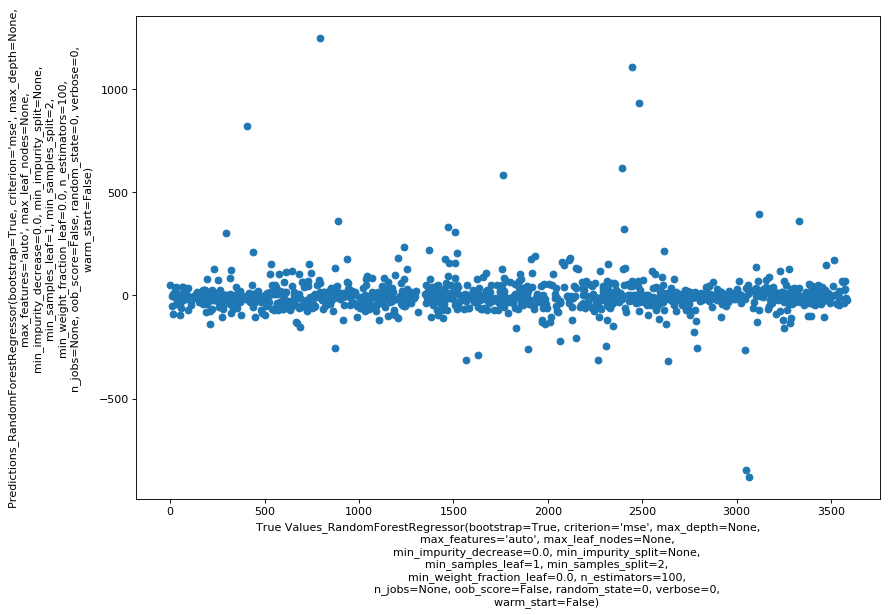

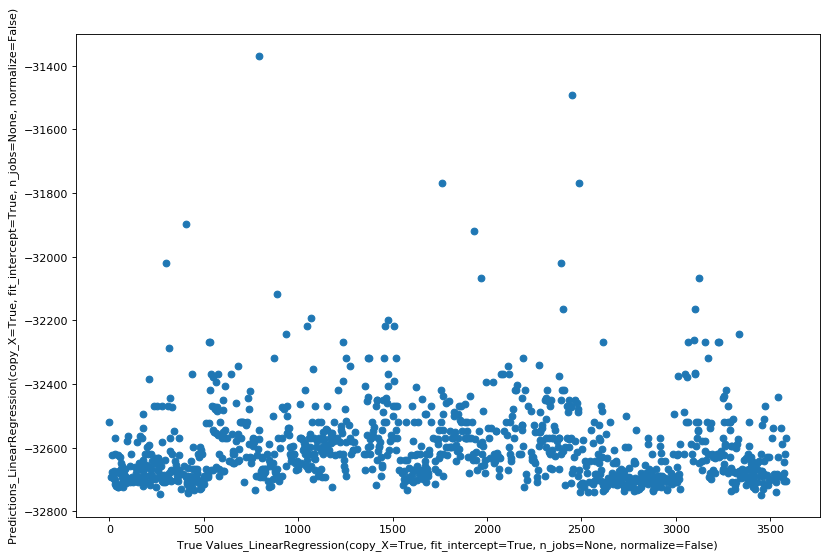

In [18]:
#Assign target y variable and features X variable
y = df_int_dummies.price

X = df_int_dummies.drop(labels = ["price"], axis = 1)

#split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


#We will create a function to fit the model and evaluate
def model_evaluate(model, x_train, y_train, x_test, y_test):
    '''Input:
    model : define prediction algorithm that we want to apply
    x_train : training dataset with input features
    y_test: training data series for target variable
    x_test: validation dataset with input features
    y_test: validation data series for target variable
    
    1.) fit the model to training data set
    2.) predict the target variable for the validation data set
    3.) compare and evaluate the predicted target variable and actual target variable for the validation data set
    
    Output:
    1.) Mean absolute error for each model applied
    2.) scatter plot for the difference between actual and predicted target variable of the validation data set
    '''
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    print("MAE from {0}:{1}".format(model, mae))
    fig = plt.figure(figsize=(12, 8), dpi=80)
    ax1 = fig.add_subplot(111)
    lines = plt.plot(y_test - pred,marker='o',linestyle='')
    ax1.set_xlabel('True Values_{}'.format(model))
    ax1.set_ylabel('Predictions_{}'.format(model))

#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)    
model_evaluate(model_rf, X_train, y_train, X_test, y_test)

#Linear Regression
model_lr = LinearRegression()
model_evaluate(model_lr, X_train, y_train, X_test, y_test)

Random forest Regressor has a MAE of 46.944 comparing to Linear Regression MAE value 171.42, which helps us to understand that Random forest model is performing better than Linear Regression.

# Data analysis and Visualization



In [19]:
#Analyse the listing dataset
#Count the number of total number of entries for each type in room_type feature
df_int.groupby(['room_type']).count()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,superhost,neighbourhood_cleansed,cancellation_policy,property_type,host_response_time
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,...,2113,2113,2113,2113,2113,2113,2113,2113,2111,2113
Private room,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,...,1365,1365,1365,1365,1365,1365,1365,1365,1364,1365
Shared room,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79


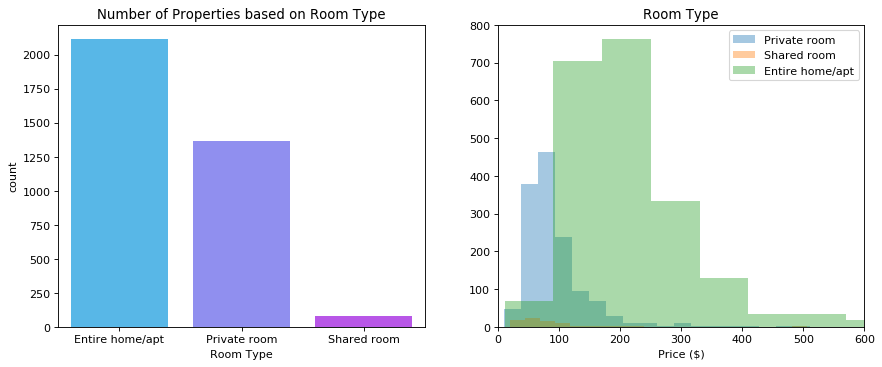

In [20]:
#Visualize the data to interpret the room_type and their mean price for each type
fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=80)
sns.countplot(x = 'room_type', data = df_int, 
              palette = 'cool', ax=axs[0]).set_title("Number of Properties based on Room Type")
axs[0].set_xlabel('Room Type')


#Visualize and understand the distriution of pricing among the each room type.
sns.distplot(df_int[df_int.room_type == 'Private room']['price'],
             kde=False, ax=axs[1], label='Private room')
sns.distplot(df_int[df_int.room_type == 'Shared room']['price'],
             kde=False, ax=axs[1], label='Shared room')
sns.distplot(df_int[df_int.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[1], label='Entire home/apt')

axs[1].set_xlim(0, 600)
axs[1].set_title('Room Type')
axs[1].set_xlabel('Price ($)')
axs[1].legend()

In [22]:
# Note number of columns
before = len(df_list.columns)

# Drop columns with all null values
all_null = len(df_list.columns[df_list.isnull().mean() == 1])
df_list = df_list.dropna(how='all', axis=1)

# Drop columns with more than 50% null values
more_null = df_list.columns[df_list.isnull().mean() > 0.5]
df_list = df_list.drop(more_null, axis=1)

# Drop columns with only one value
one_value_columns = [
    column for column in df_list.columns if len(df_list[column].unique()) == 1
]
df_list.drop(one_value_columns, axis=1, inplace=True)

# Drop url, ID (except for 'id') and name columns
url_id_columns = df_list.columns[df_list.columns.str.contains('url|_id|name')]
df_list = df_list.drop(url_id_columns, axis=1)

print(
    '{} columns dropped:\
    \n\t{} columns with only null values\
    \n\t{} columns with more than 50% null values\
    \n\t{} columns with only one unique value\
    \n\t{} URL/ID/name columns'.format(
        before - len(df_list.columns), all_null, len(more_null),
        len(one_value_columns), len(url_id_columns)
    )
)

24 columns dropped:    
	0 columns with only null values    
	4 columns with more than 50% null values    
	8 columns with only one unique value    
	12 URL/ID/name columns


Now we will drop a bunch of features for various reasons:

- they're covered by other features
- they are likely to add variance to the model by being colinear to our target variable
- they are almost completely one value

In [23]:
to_drop = [
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood',
    'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
    'is_location_exact', 'cleaning_fee', 'guests_included', 'extra_people',
    'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_30',
    'bed_type', 'availability_60', 'availability_90', 'availability_365',
    'first_review', 'last_review', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'require_guest_profile_picture', 
    'require_guest_phone_verification'
]

df_list = df_list.drop(to_drop, axis=1)

We are now going to convert text features to numerical ones.

- Summary and description features will be converted to a character count to see if a longer description helps.
- We will create a boolean local feature based on whether the host is from Boston or not
- host_since will be converted to a timedelta between an individual host's sign up date and the most recent host sign up
- host_response_time will be converted to a dummy variable
- % and $ signs will be stripped
- amenities column will be converted to a count of amenities listed
- Convert boolean t/f features to 1 or 0

In [24]:
# Define description features
description_features = ['summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

# Convert null values to empty strings
df_list[description_features] = df_list[description_features].apply(lambda col: col.fillna(''), axis=1)

# Convert description features to character counts
for column in df_list[description_features]:
    df_list[column] = df_list[column].apply(lambda x: len(x))

# Convert host_since to datetime and create host_since_days timedelta feature
df_list.host_since = pd.to_datetime(df_list.host_since, yearfirst=True)
df_list['host_since_days'] = (df_list.host_since - df_list.host_since.min()).dt.days

# Create is_local feature based on host_location
local_destination = 'Boston, Massachusetts, United States'
df_list['is_local'] = df_list.host_location.apply(
    lambda location: 1 if location==local_destination else 0
)

# Drop converted features
df_list = df_list.drop(['host_since', 'host_location'], axis=1)

# Map host_response_time values to numerical values
response_map = {
    np.nan: 0,
    'a few days or more': 1,
    'within a day': 2,
    'within a few hours': 3,
    'within an hour': 4
}
df_list.host_response_time = df_list.host_response_time.replace(response_map)

# Remove ['$', ',', '%'] and convert to float
str_to_float_columns = ['host_response_rate', 'host_acceptance_rate', 'price']
for column in str_to_float_columns:
#     listings[column] = listings[column].str.replace('$', '').str.replace('%', '').str.replace(',', '').astype(float)
    df_list[column] = df_list[column].apply(lambda value: re.sub(r'\$|,|%', '', str(value))).astype(float)
    
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['host_is_superhost', 'instant_bookable']
for column in boolean_columns:
    df_list[column] = df_list[column].apply(lambda val: True if val=='t' else False)
    
# Convert amenities to amenities_count
df_list['amenities_count'] = df_list.amenities.str.count(',')+1
df_list = df_list.drop('amenities', axis=1)

# Dropping listings without reviews

We want to understand what price to put for our new listing, we want to model this off "successful" listings. Therefore we're going to remove listings without a review. This also has the handy side effect of removing some listings that might define as outliers. Outliers can greatly impact a model's ability to predict pricing and account for variance but should not be removed for this reason alone. Data points may look like outliers but in our case, unless if they're an obvious mistake (e.g. a typo or other), then they are valid.

In [25]:
num_without_reviews = len(df_list[df_list.number_of_reviews==0])
percent_gone = num_without_reviews/len(df_list)

print(f'{num_without_reviews} rows or {percent_gone:.2%} of rows dropped as having no reviews')

df_list = df_list[df_list.number_of_reviews!=0]

750 rows or 21.09% of rows dropped as having no reviews


# Calendar data clean up

First off, with price as our target variable, we will drop any rows where the price is null. A quick glance at the data shows that this value is null when the listing is not availble for a given date.

Therefore we drop rows where price is null and drop the available column as this then contains only one value.

In [26]:
df_cal.sample(2)

,listing_id,date,available,price,month
1108360,10426124,2017-01-04,t,99.0,Jan
116512,3593290,2017-04-06,t,325.0,Apr


In [29]:
# Drop any rows without the predictor value
df_cal.dropna(subset=['price'], inplace=True)


# Extract month from date string and rewrite values
df_cal['month'] = df_cal.date.apply(lambda value: value.split('-')[1])
df_cal['month'] = df_cal['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

# Drop available and date columns
df_cal = df_cal.drop(['available', 'date'], axis=1)

df_cal.sample(2)

,listing_id,price,month
87503,336960,65.0,Dec
118661,9212213,65.0,May


# Merge datasets

With both datasets cleaned up and transformed where needed, we can now merge the two. This will give us two price columns so we'll keep only the time-sensitive one coming from the calendar dataset.

In [30]:
df = pd.merge(
    df_list, df_cal, how='left',
    left_on='id', right_on='listing_id',
)

df = df.drop(['price_x', 'listing_id' ], axis=1)
df = df.rename({'price_y': 'price'}, axis=1)

# Drop any remaining rows without a price value
df = df.dropna(subset=['price'])

df.sample(3)

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,...,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count,price,month
506716,11896394,288,33,322,0,0,0,0,18,0,...,9.0,False,strict,1,2.50,1953,1,15,105.0,Aug
29617,2698996,162,1000,1000,173,1000,406,221,125,62,...,10.0,False,moderate,1,4.45,1968,1,17,71.0,Dec
365535,11921486,208,0,656,97,102,226,19,36,0,...,9.0,False,flexible,1,0.38,2685,0,8,90.0,Aug


# Exploring the data for trends

With some basic cleaning and feature engineering done, let's explore our dataset.

It's clear from the basic plots below that we have some informative features in our dataset.

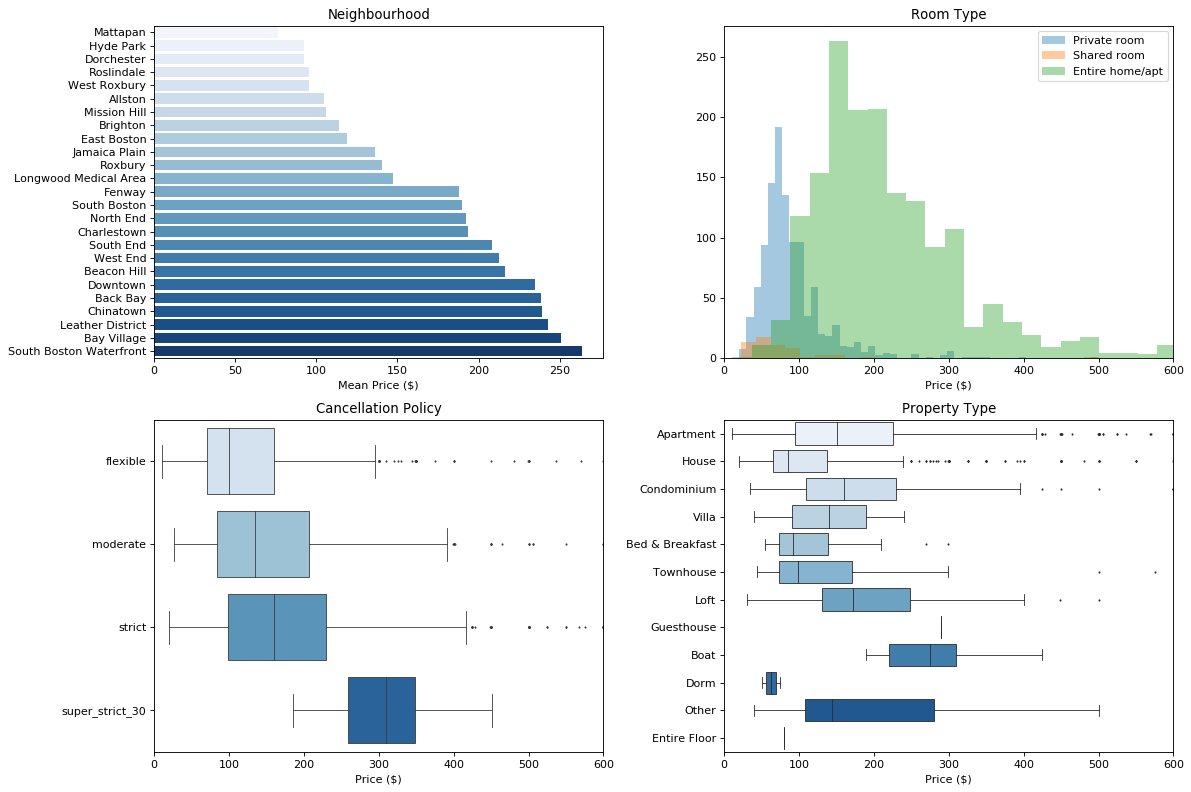

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=80)

# Neighbourhoods
neighbourhoods = df_list.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='Blues',
    ax=axs[0, 0]
)
axs[0, 0].set_title('Neighbourhood')
axs[0, 0].set_xlabel('Mean Price ($)')
axs[0, 0].set_ylabel('')

# Room type
# The easiest way to plot this would be using histplot available in seaborn >= 0.11.0
# sns.histplot(x='price', hue='room_type', data=listings, ax=axs[0, 1])
# Instead we use distplot
sns.distplot(df_list[df_list.room_type == 'Private room']['price'],
             kde=False, ax=axs[0, 1], label='Private room')
sns.distplot(df_list[df_list.room_type == 'Shared room']['price'],
             kde=False, ax=axs[0, 1], label='Shared room')
sns.distplot(df_list[df_list.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[0, 1], label='Entire home/apt')
axs[0, 1].set_xlim(0, 600)
axs[0, 1].set_title('Room Type')
axs[0, 1].set_xlabel('Price ($)')
axs[0, 1].legend()

# Cancellation Policy
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75,
            data=df_list, palette='Blues', ax=axs[1, 0],
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
axs[1, 0].set_xlim(0, 600)
axs[1, 0].set_title('Cancellation Policy')
axs[1, 0].set_xlabel('Price ($)')
axs[1, 0].set_ylabel('')

# Property type
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75,
            data=df_list, palette='Blues', ax=axs[1, 1])
axs[1, 1].set_xlim(0, 600)
axs[1, 1].set_title('Property Type')
axs[1, 1].set_xlabel('Price ($)')
axs[1, 1].set_ylabel('')

plt.tight_layout()
plt.show();

There's a particularly strong relationship here between price and the number of bedrooms. The month plot is on quite a narrow scale suggesting that it's impact is not so great. We can also see a potentially non-linear relationship between bathrooms and price here.

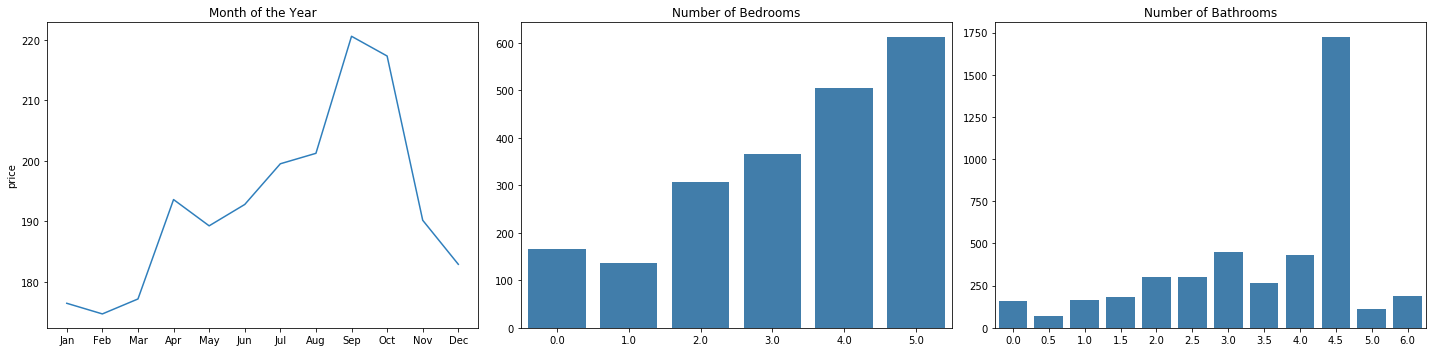

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Month plot
months = df.groupby('month').agg({'price': 'mean'}).reset_index()

# Converting to category to be able to set the order
months.month = months.month.astype('category')
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months.month.cat.set_categories(sorter, inplace=True)

sns.lineplot(
    x='month', y='price',
    data=months,
#     orient='v',
    color='#2F7FBC',
    ax=axs[0]
)
axs[0].set_title('Month of the Year')
axs[0].set_xlabel('')

# Bedrooms
bedrooms = df.groupby('bedrooms').agg({'price': 'mean'}).reset_index()
sns.barplot(
    x='bedrooms', y='price',
    data=bedrooms,
    orient='v',
    color='#2F7FBC',
    ax=axs[1]
)
axs[1].set_title('Number of Bedrooms')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Bathrooms
bathrooms = df.groupby('bathrooms').agg({'price': 'mean'}).reset_index()
sns.barplot(
    x='bathrooms', y='price',
    data=bathrooms,
    orient='v',
    color='#2F7FBC',
    ax=axs[2]
)
axs[2].set_title('Number of Bathrooms')
axs[2].set_xlabel('')
axs[2].set_ylabel('')

plt.tight_layout()

plt.show()


Let's take a look at the numerical description features we created from the text summaries about the listing, neighbourhood, etc. We transformed text descriptions into character counts.


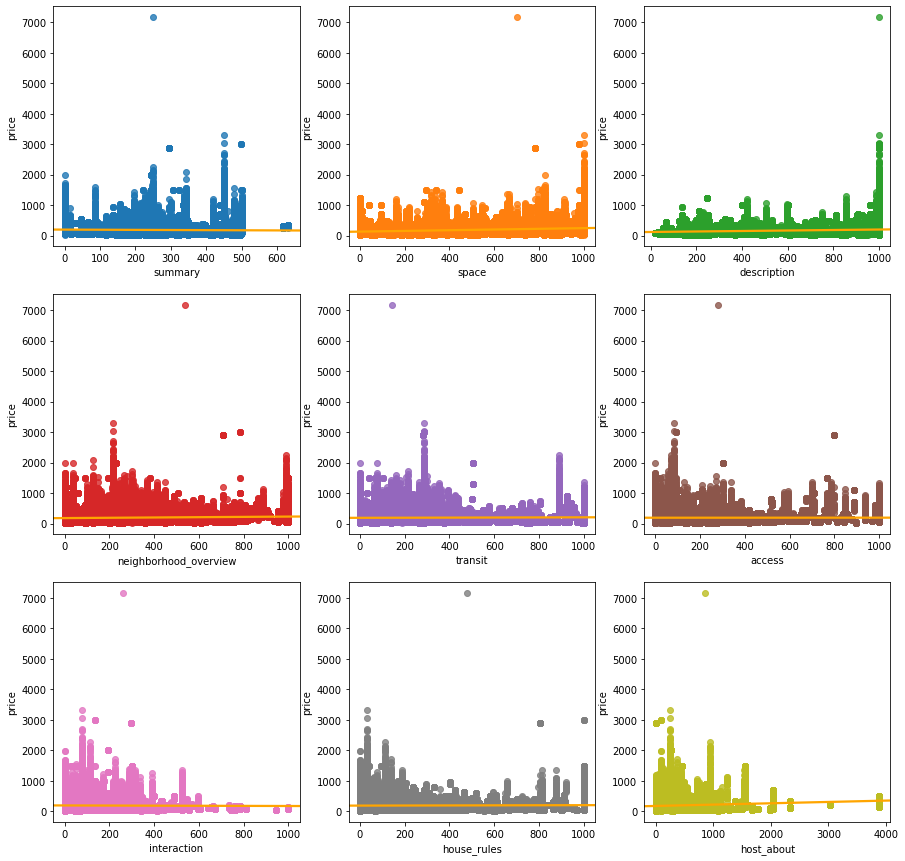

In [33]:
import re
description_features = ['summary', 'space', 'description',
                        'neighborhood_overview', 'transit', 'access',
                        'interaction', 'house_rules', 'host_about']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for feature, ax in zip(description_features, axs.reshape(-1)):
    sns.regplot(x=feature, y='price', data=df, ax=ax, ci=None, line_kws={'color': 'orange'})

With no evidence of any strong relationships here, we'll drop these features to reduce complexity. It's also simple enough to run the regression models with or without these features to see that they have no impact.

In [34]:
df = df.drop(description_features, axis=1)

In [35]:
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count,price,month
0,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,65.0,Aug
1,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,65.0,Aug
2,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,65.0,Aug
3,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,75.0,Aug
4,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,75.0,Aug


# Preprocessing step

As a final bit of preprocessing, we'll deal with missing values, encode categorical features and drop the id column.

5% of the rows contain missing data in one of the columns, mostly the host_response_rate and host_acceptance_rate columns. Even though it seems lazy, I see no reason why we shouldn't impute these missing values with the median rather than drop this 5% of the data.

In [36]:
import re

# Dropping the extremely small subset of rows with no property_type
df = df.dropna(subset=['property_type']).copy()

# Imputing the mean for the remaining columns with null values
columns_with_null = df.columns[df.isnull().any()]
for column in columns_with_null:
    df[column] = df[column].fillna(df[column].median())

Finally we create dummies and drop the id column.

In [37]:
df = pd.get_dummies(df)
df = df.drop(['id'], axis=1)
df.sample(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,security_deposit,number_of_reviews,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
350766,3,89.0,45.0,False,2,1.0,1.0,1.0,250.0,3,...,0,0,0,0,0,1,0,0,0,0
477823,4,100.0,76.0,False,4,2.0,2.0,2.0,500.0,84,...,0,0,1,0,0,0,0,0,0,0
186805,4,100.0,99.0,True,7,2.0,3.0,3.0,600.0,95,...,1,0,0,0,0,0,0,0,0,0


# Modelling

We'll fit the data to a few different regression methods but the trusty Linear Regression may suit our needs best. The data may contain non-linear relationships that Linear Regression will not be able to capture but it does have the significant benefit of being easily interpretable and the coefficients provided by the model will allow us to easily get a rough idea for how much we should be charging for listings.

We'll then use a few tree-based ensemble methods. Tree-based methods give us great flexibility in their ability to describe non-linear relationships but they also tend to be very sensitive to small variations in the training data and, unconstrained, can lead to overfitting. This is why we'll use a few ensemble methods to reduce this tendency to overfit. Further, tree-based methods allow for measuring the importance of features in prediction.


# Linear Regression

With a moderate amount of features, we'll need to keep an eye on overfitting, scoring the model on both the training and test sets. If we were to detect any bias/variance then we can look at one of the regularisation methods.

In [43]:
def print_scores(model):
    """Print the R-squared and RMSE scores for the train and test set
    
    Parameters
        model: fitted regression model
    """
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

    print(
        'Train R-squared: {:.3f}\tTrain RMSE: ${:.2f}\
        \nTest R-squared: {:.3f}\tTest RMSE: ${:.2f}'
        .format(r2_train, rmse_train, r2_test, rmse_test)
    )

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = df.drop('price', axis=1)
y = df.price

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Use previously created function to output metric scores
print_scores(model)


Train R-squared: 0.600	Train RMSE: $96.99        
Test R-squared: 0.602	Test RMSE: $96.97


Our model spits out an R-squared score of 60% meaning that we can account for around 60% of the variance using our features using Linear Regression. We also need to bear in mind the significant standard deviation of the residuals represented by the $97 root-mean-squared-error. Predictions made with the model have a large error margin.

Now let's have a look at the coefficients.

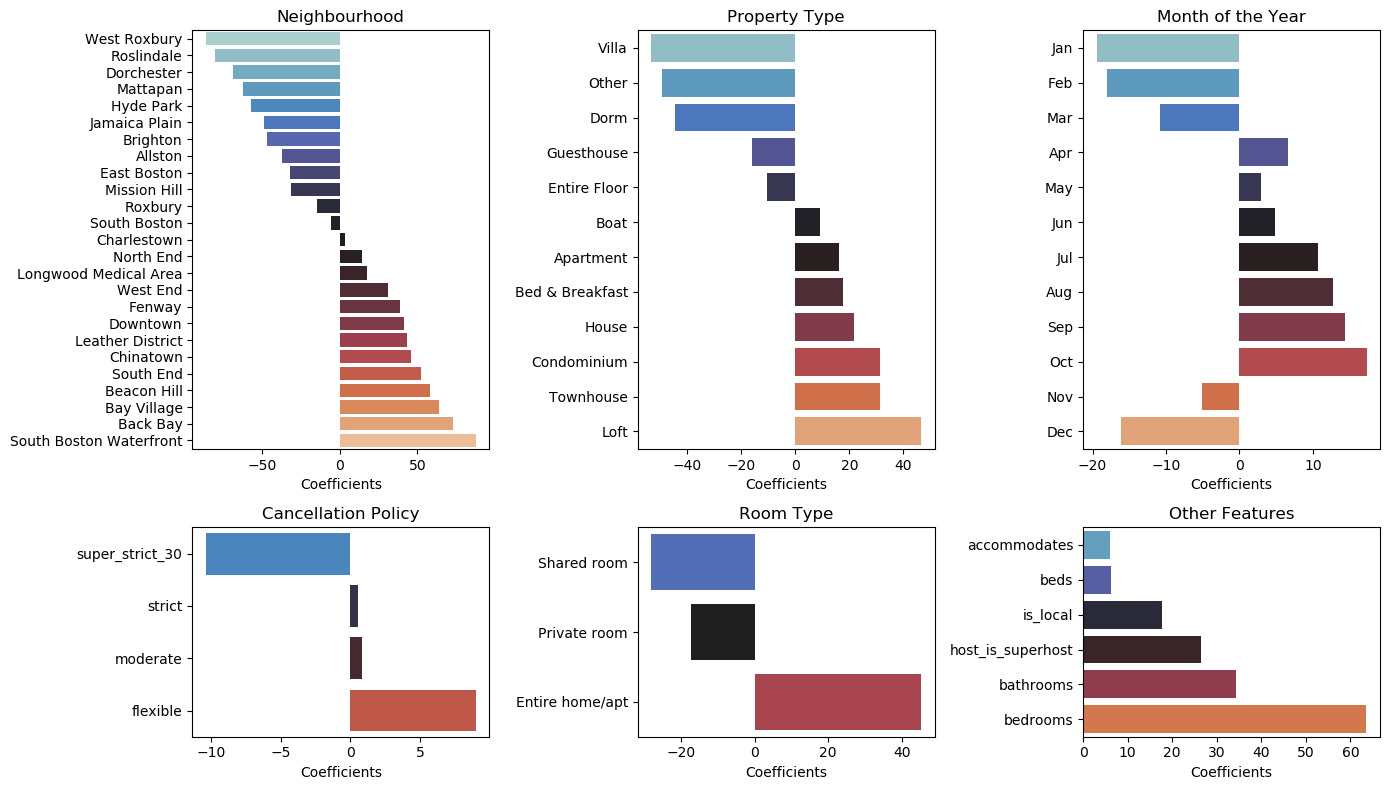

In [47]:
def filter_coefficients(keyword, coefficients_df):
    """
    Filters a dataframe of coefficients for specific features
    
    Parameters:
        keyword (str): The keyword to filter the features by
        coefficients_df (DataFrame): the coefficients df to filter by
    
    Returns:
        df (DataFrame): a keyword filtered dataframe of coefficients
    """
    
    df = coefficients_df[coefficients_df.\
                         features.str.contains(keyword)].copy()
    df.features = df.features.str.lstrip(keyword+'_')
    
    return df

def plot_coefficients(coefficients_df, ax=None, palette='icefire', xlabel='Coefficients', title=None):
    """Plots a horizontal barplot of the coefficients"""
    
    sns.barplot(
        y='features', x='coefficients',
        orient='h', data=coefficients_df,
        palette=palette,
        ax = ax
    )
    if ax:
        ax.set_xlabel(xlabel)
        ax.set_ylabel('')
        ax.set_title(title)
    else:
        plt.xlabel(xlabel)
        plt.ylabel('')
        plt.title(title)
        
# Create the subplot grid
fig, axs = plt.subplots(2, 3, figsize=(14, 8), dpi=100,
                        gridspec_kw = {'height_ratios': [4, 2]})

# Create lists to loop over for simple plots
keywords = ['neighbourhood_cleansed', 'property_type', 'cancellation_policy', 'room_type']
titles = ['Neighbourhood', 'Property Type', 'Cancellation Policy', 'Room Type']
axes = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]

for kw, title, axis in zip(keywords, titles, axes):
    plot_coefficients(
        filter_coefficients(kw, feature_importance),
        ax=axis,
        title=title
    )

# Filter and sort months
month = filter_coefficients('month', feature_importance)
month.features = month.features.astype('category')
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month['features'].cat.set_categories(sorter, inplace=True)
plot_coefficients(month, ax=axs[0, 2], title='Month of the Year')

# Pick final few features
other = feature_importance[feature_importance.features.isin(
    ['bedrooms', 'bathrooms', 'beds', 'accommodates',
     'host_is_superhost', 'is_local']
)].copy()
plot_coefficients(other, ax=axs[1, 2], title='Other Features')

fig.tight_layout()
plt.show();

There are some clear drawbacks to this model. For one thing, it's possible to plug in data to return a negative listing price implying that you should pay someone to come and stay in your dorm in West Roxbury in December. However, whilst Linear Regression in this case may not be the best method to accurately predict listing prices, it does provide an easily interpeted model that can be used (at least in some form) without even needing to use anything other than a pen and paper.

We'll now look at some ensemble methods to see if we can better account for the variation in the data.

# Ensemble methods

As mentioned, ensembled methods allow us leverage the flexibility of (in this case) tree-based models whilst reducing their tendency to memorise noise.

# Random Forests

Random Forests is one of the most powerful Machine Learning algorithms, despite its simplicity. It is an ensemble of Decision Trees, taking the average prediction from multiple individual trees all trained on a different random subset of the training data. Let's see how it does on our data.

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, n_jobs=-1)
rf.fit(X_train, y_train)
print_scores(rf)

Train R-squared: 0.936	Train RMSE: $38.72        
Test R-squared: 0.935	Test RMSE: $39.26


Over 93% of the variance accounted for using Random Forests and with no sign of overfitting! Note though the sizable residual error standard deviation. There is stil a room for error even with so much of the variability in our dataset accounted for.

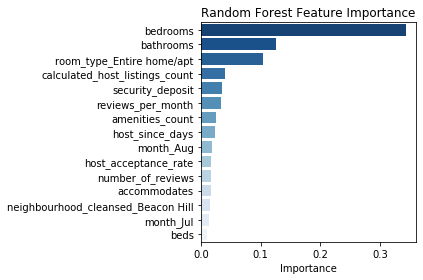

In [62]:
def get_feature_importances(model):
    """Return sorted model feature importances"""
    
    df = pd.DataFrame(
        {'features': X.columns, 'coefficients': model.feature_importances_}
    ).sort_values(by='coefficients', ascending=False)[:15]
    return df
        
plot_coefficients(
    get_feature_importances(rf), xlabel='Importance',
    title='Random Forest Feature Importance', palette='Blues_r')

plt.tight_layout()
plt.show()

# Conclusion

Avoiding complexity
Through the models chosen and with the task at hand, we've managed to avoid some extra steps here in making our predictions. We did not need to scale our data since we used Linear Regression rather than one of the regularized methods and scaling did not impact the ensemble methods. Further, since we are only providing guidelines, we did not need to optimize our models with hyperparameter tuning. Our ensemble methods scored well enough by most standards without the added complexity.


The models have given us some sensible guidelines for choosing how much to put a place up for on Airbnb but in each case, there was a sizeable error margin.

While our models do a great job at generalizing prices based on features, each listing is unique and what makes a traveller decide that your place is worth the money comes down to many features we won't be able to capture, although Airbnb do their best with their model.